In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [14]:
int(np.sqrt(len(men_subset)))

19

In [3]:
men = pd.read_csv("men_results.csv", index_col = [0])
men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
men.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [5]:
men['date'] = pd.to_datetime(men['date'])

In [6]:
men['total_score'] = men['home_score'] + men['away_score']

In [9]:
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))].copy()

In [10]:
men_subset.head()

,date,home_team,away_team,home_score,away_score,tournament,total_score
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [11]:
men_subset.shape

(384, 7)

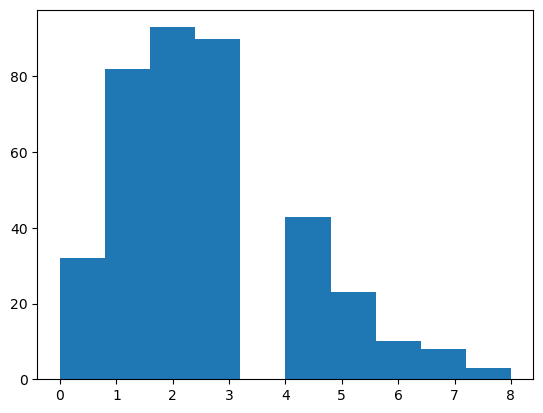

In [15]:
plt.hist(men_subset['total_score'])
plt.show()

###### the total score for men does not follow a normal distribution

In [16]:
women = pd.read_csv("women_results.csv", index_col = [0])
women.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [ ]:
# Filter the data for the time range and tournament
women["date"] = pd.to_datetime(women["date"])


In [17]:
women["total_score"] = women["home_score"] + women["away_score"]

In [18]:
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

In [19]:
women_subset.head()

,date,home_team,away_team,home_score,away_score,tournament,total_score
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


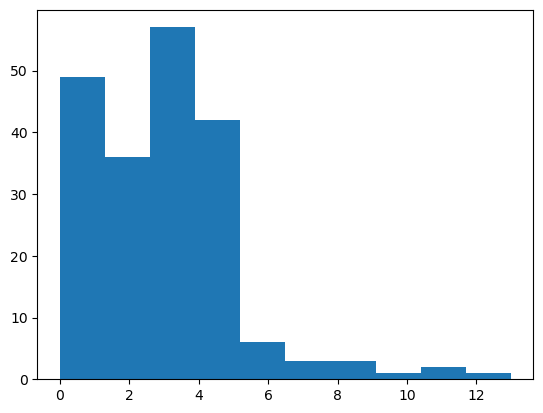

In [20]:
plt.hist(women_subset['total_score'])
plt.show()

###### women total score does not follow a normal distribution 

### then we conclude that a non-parametric test will be used 
### and since it tests 2 unpaired samples we will use Wilcoxon-Mann-Whitney

In [22]:
from scipy.stats import mannwhitneyu
results_scipy = mannwhitneyu(x=women_subset["total_score"],
                             y=men_subset["total_score"],
                             alternative="greater")
print(results_scipy)

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)


###### since p-value is less than 0.10 (significance level) then we reject the null hypotheses that
###### women's total_score is greater than men's total score